**Student ID:** 6617400275

**Student Name:** Rachakrit Monyanon

In [1]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 32.3 MB/s eta 0:00:00


In [2]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
import matplotlib.pyplot as plt
import itertools

In [3]:
import pandas as pd
import numpy as np
from pythainlp.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
from google.colab import files
uploaded = files.upload()

Saving FastFood_Opinion.csv to FastFood_Opinion.csv


In [5]:
# Step 1: Load and preprocess the data
data = pd.read_csv('FastFood_Opinion.csv')
data

,class,message
0,0,11.30 น. ไปที่สาขาในปั๊มคาลเท็กซ์ ประชานุกูล ซ...
1,0,BK ทุกสาขาบริการดี โดยเฉพาะอย่างยิ่งเอมโพเรียม...
2,0,Burger King สาขา The Bright พระราม 2 บริการห่ว...
3,0,Burger King สาขาปั้ม ป.ต.ท.บ้านพร อ.ถลาง เมื่อ...
4,0,chicken strip ชิ้นเล็กมาก เทียบกับป้ายโฆษณาบนโต๊ะ
...,...,...
637,1,ช่วงโปรฯ คุณภาพเกินราคาคะ
638,1,อร่อยมาก ราคาโอเครเลยค่ะ
639,1,อาหารอร่อยมากคะ
640,1,คุณภาพและการบริการระดับ 5 ดาว


In [6]:
X = data['message'].astype(str)  # Text data in the 'message' column
y_class = data['class']  # Labels in the 'class' column

In [7]:
# ตรวจสอบ message
X

0      11.30 น. ไปที่สาขาในปั๊มคาลเท็กซ์ ประชานุกูล ซ...
1      BK ทุกสาขาบริการดี โดยเฉพาะอย่างยิ่งเอมโพเรียม...
2      Burger King สาขา The Bright พระราม 2 บริการห่ว...
3      Burger King สาขาปั้ม ป.ต.ท.บ้านพร อ.ถลาง เมื่อ...
4      chicken strip ชิ้นเล็กมาก เทียบกับป้ายโฆษณาบนโต๊ะ
                             ...                        
637                            ช่วงโปรฯ คุณภาพเกินราคาคะ
638                             อร่อยมาก ราคาโอเครเลยค่ะ
639                                      อาหารอร่อยมากคะ
640                        คุณภาพและการบริการระดับ 5 ดาว
641                                   อาหารอร่อยมากๆ ค่ะ
Name: message, Length: 642, dtype: object

In [8]:
#ตรวจสอบว่าเป็น imbalance ไหม
class_counts = data['class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

class_counts

,Class,Count
0,0,359
1,1,283


In [9]:
# Tokenize Thai text
X_tokenized = X.apply(word_tokenize, keep_whitespace=False)
X_tokenized

0      [11.30, น., ไป, ที่, สาขา, ใน, ปั๊ม, คาลเท็กซ์...
1      [BK, ทุก, สาขา, บริการ, ดี, โดยเฉพาะอย่างยิ่ง,...
2      [Burger, King, สาขา, The, Bright, พระราม, 2, บ...
3      [Burger, King, สาขา, ปั้ม, ป., ต., ท., บ้าน, พ...
4      [chicken, strip, ชิ้น, เล็ก, มาก, เทียบ, กับ, ...
                             ...                        
637               [ช่วง, โปร, ฯ, คุณภาพ, เกิน, ราคา, คะ]
638                [อร่อย, มาก, ราคา, โอเค, ร, เลย, ค่ะ]
639                              [อาหาร, อร่อย, มาก, คะ]
640            [คุณภาพ, และ, การ, บริการ, ระดับ, 5, ดาว]
641                          [อาหาร, อร่อย, มาก, ๆ, ค่ะ]
Name: message, Length: 642, dtype: object

In [10]:
#ทำ word index
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_tokenized)
tokenizer.word_index

{'ไม่': 1,
 'ไป': 2,
 'มา': 3,
 'ที่': 4,
 'ค่ะ': 5,
 'ก็': 6,
 'สาขา': 7,
 'เลย': 8,
 'พนักงาน': 9,
 'มี': 10,
 'ได้': 11,
 'มาก': 12,
 'ว่า': 13,
 'ให้': 14,
 'จะ': 15,
 'แต่': 16,
 'แล้ว': 17,
 'ๆ': 18,
 'บริการ': 19,
 'สั่ง': 20,
 'ทาน': 21,
 'เรา': 22,
 'กิน': 23,
 'ลูกค้า': 24,
 'และ': 25,
 'ครับ': 26,
 'อาหาร': 27,
 'อร่อย': 28,
 'กับ': 29,
 'ดี': 30,
 'เป็น': 31,
 'ของ': 32,
 'ร้าน': 33,
 'ใน': 34,
 'คะ': 35,
 'คน': 36,
 'ด้วย': 37,
 'นะคะ': 38,
 'บอก': 39,
 'คือ': 40,
 'นะ': 41,
 'ยัง': 42,
 'กว่า': 43,
 'นี้': 44,
 'อยาก': 45,
 'ถ้า': 46,
 'ต้อง': 47,
 'อีก': 48,
 'วันนี้': 49,
 'ชอบ': 50,
 'เอา': 51,
 'รอ': 52,
 'รับ': 53,
 'การ': 54,
 '2': 55,
 '1': 56,
 'ถึง': 57,
 'มัน': 58,
 'ส่ง': 59,
 'พอ': 60,
 'ทำ': 61,
 'โต๊ะ': 62,
 'ใช้': 63,
 'ถาม': 64,
 'แจ้ง': 65,
 'พน': 66,
 'เพราะ': 67,
 'เดิน': 68,
 'อยู่': 69,
 'แบบนี้': 70,
 'ขอ': 71,
 '.': 72,
 'อะไร': 73,
 'พิซซ่า': 74,
 'สลัด': 75,
 'นั่ง': 76,
 'เยอะ': 77,
 'โทร': 78,
 'ปรับปรุง': 79,
 'เมนู': 80,
 'หมด': 81,
 'บอ': 82,

In [11]:
#ทำ One hot {0 : negative => [1,0], 1: positive => [0,1]}
from keras.utils import to_categorical
print("Unique lables = " , set(data['class']))
y=to_categorical([ int(i) for i in data['class']])
print(y)
print(y[0], "=>", np.argmax(y[0]))
print(y[600], "=>", np.argmax(y[600]))

Unique lables =  {0, 1}
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1. 0.] => 0
[0. 1.] => 1


In [12]:
#ใส่ padding ให้ input ทุกประโยคมีความยาวเท่ากัน โดยความยาวจะใช้เท่ากับความยาวของประโยคที่ยาวที่สุด
from keras.preprocessing.sequence import pad_sequences
tts = tokenizer.texts_to_sequences(X_tokenized)
maxlen = max([len(s) for s in tts])
print("max sentense's length = " , maxlen)
x = pad_sequences(tts, maxlen=maxlen, padding="post")
print("Squence Padding at maxlen words, post padding:\n", x)

max sentense's length =  417
Squence Padding at maxlen words, post padding:
 [[1023  249    2 ...    0    0    0]
 [ 634  161    7 ...    0    0    0]
 [ 183  235    7 ...    0    0    0]
 ...
 [  27   28   12 ...    0    0    0]
 [ 118   25   54 ...    0    0    0]
 [  27   28   12 ...    0    0    0]]


In [13]:
# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from sklearn.metrics import confusion_matrix

vocab_size = len(tokenizer.word_index) +1

# Fix Random Weight
# For reproducable
np.random.seed(7)

NNmodel = Sequential()
NNmodel.add(Embedding(input_dim=vocab_size,
                    output_dim=10,
                    input_length=maxlen))
NNmodel.add(Flatten())
NNmodel.add(Dense(4000, activation='relu'))
NNmodel.add(Dense(4000, activation='relu'))
NNmodel.add(Dense(4000, activation='relu'))
NNmodel.add(Dense(4000, activation='relu'))
NNmodel.add(Dense(2, activation='softmax'))
NNmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 417, 10)           35010     
                                                                 
 flatten (Flatten)           (None, 4170)              0         
                                                                 
 dense (Dense)               (None, 4000)              16684000  
                                                                 
 dense_1 (Dense)             (None, 4000)              16004000  
                                                                 
 dense_2 (Dense)             (None, 4000)              16004000  
                                                                 
 dense_3 (Dense)             (None, 4000)              16004000  
                                                                 
 dense_4 (Dense)             (None, 2)                 8

Epoch 1/6
13/13 [==============================] - 19s 1s/step - loss: 3.2527e-04 - accuracy: 1.0000 - val_loss: 2.5447e-04 - val_accuracy: 1.0000
Epoch 2/6
13/13 [==============================] - 17s 1s/step - loss: 1.0212e-04 - accuracy: 1.0000 - val_loss: 8.3489e-05 - val_accuracy: 1.0000
Epoch 3/6
13/13 [==============================] - 16s 1s/step - loss: 2.7767e-05 - accuracy: 1.0000 - val_loss: 2.8267e-05 - val_accuracy: 1.0000
Epoch 4/6
13/13 [==============================] - 16s 1s/step - loss: 1.0340e-05 - accuracy: 1.0000 - val_loss: 1.1326e-05 - val_accuracy: 1.0000
Epoch 5/6
13/13 [==============================] - 17s 1s/step - loss: 3.8426e-06 - accuracy: 1.0000 - val_loss: 6.7424e-06 - val_accuracy: 1.0000
Epoch 6/6
13/13 [==============================] - 17s 1s/step - loss: 2.4280e-06 - accuracy: 1.0000 - val_loss: 4.6223e-06 - val_accuracy: 1.0000


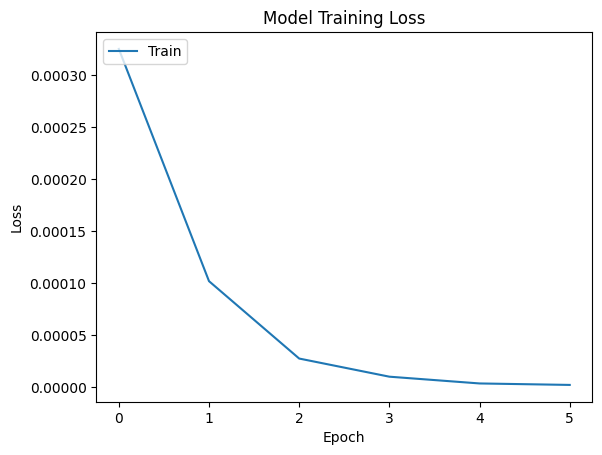

In [16]:
history = NNmodel.fit(X_train,y_train, epochs=6,validation_split=0.2)
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

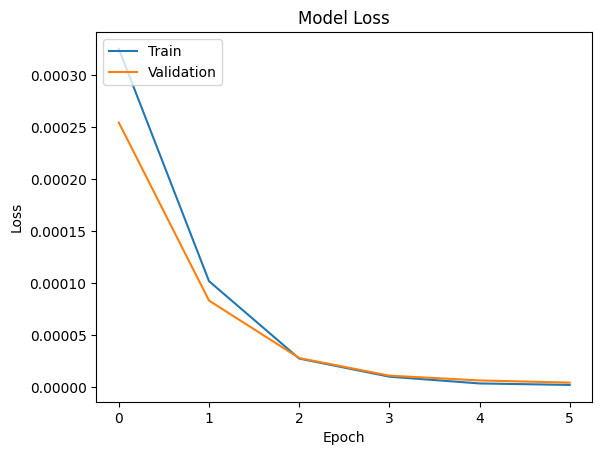

In [17]:
# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

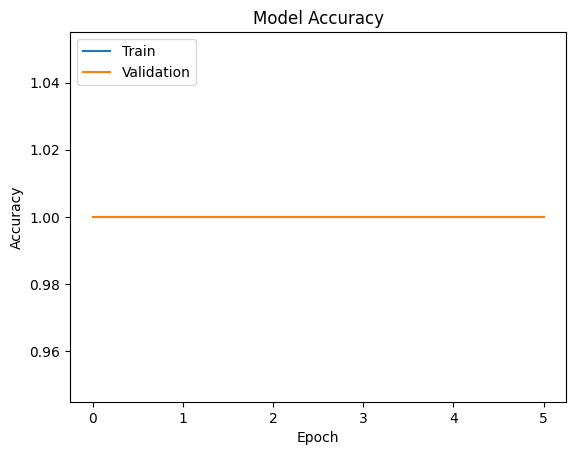

In [18]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = NNmodel.predict(X_test)
y_t=[ np.argmax(i) for i in y_test]
y_p=[ np.argmax(i) for i in y_predict]

accuracy = accuracy_score(y_t, y_p)
print("--- NN Model ---")
print("Accuracy:", accuracy)
# Print classification report (precision, recall, F1-score, support)
print("Classification Report:")
print(classification_report(y_t,y_p ))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_t, y_p))

5/5 [==============================] - 0s 85ms/step
--- NN Model ---
Accuracy: 0.8837209302325582
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        74
           1       0.87      0.85      0.86        55

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129

Confusion Matrix:
[[67  7]
 [ 8 47]]
